In [1]:
import numpy as np
import sys
import os
import matplotlib.pyplot as plt

sys.path.append('../')
from src.grid import *
from src import pml, pec_pmc_boundary
from eigenwell.src.constants import *

In [2]:
N = [100,100]
dL = np.array([0.01, 0.01])*1e-6
# plt.figure(figsize = (10,10))
# plt.spy(fd.Dyb, markersize = 2)
L= N*dL;
print(L)
xrange = [-L[0]/2, L[0]/2]
yrange = [-L[1]/2, L[1]/2]

[1.e-06 1.e-06]


In [9]:
def grid_average(center_array, w):
    '''
        center_array, 1d eps_r
    '''
    # computes values at cell edges

    xy = {'x': 0, 'y': 1}
    center_shifted = np.roll(center_array, 1, axis=xy[w])
    avg_array = (center_shifted+center_array)/2
    return avg_array

## PML test
Best way to test pml is FDFD driven

(10000, 10000) (10000,)


/Users/nathanzhao/opt/anaconda3/lib/python3.8/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:318: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)


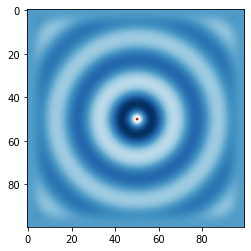

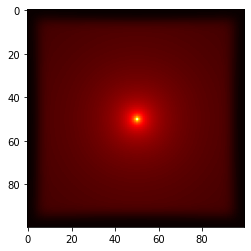

In [3]:
from scipy.sparse.linalg import spsolve as bslash
eps_r = np.ones(N)
wvlen = 0.2e-6;
Mz = np.zeros(N)

Npml = [15,15]
Mz[N[0]//2,N[1]//2] = 1;

b = (Mz.flatten());

omega = 2*np.pi*C0/wvlen;

pml_obj = pml.PML(N,Npml, omega);
pml_obj.Soperators(xrange, yrange);

fd = FiniteDifference(dL,N)
fd.make_derivatives(PML=pml_obj)

Tep = sp.spdiags(eps_r.flatten(), 0, np.prod(N), np.prod(N))

A = fd.Dxf@fd.Dxb + fd.Dyf@fd.Dyb + omega**2*MU0*EPSILON0*Tep;
print(A.shape, b.shape)
## spsolve
from scipy.sparse.linalg import splu
solver = splu(A);

x = solver.solve(b)
field = np.reshape(x, N)

plt.imshow(np.real(field), cmap = 'RdBu')
plt.show();

plt.imshow(np.abs(field), cmap = 'hot')
plt.show();

(10000, 10000)


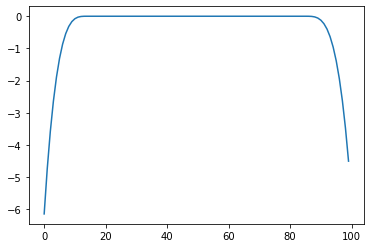

In [4]:
print(pml_obj.Sxf.shape)
plt.plot(np.imag(pml_obj.sxb))

## Symmetrization of PML

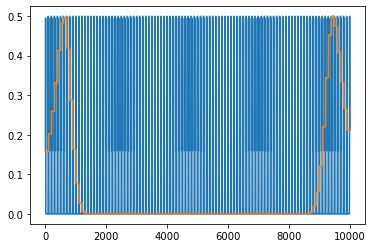

(10000, 10000)
  (0, 1)	(-309382405205228.4+119187269796265.56j)
  (0, 0)	(2118876291971837-413355037437221.4j)
  (0, 99)	(-333869637797079.7+134946522672680.44j)
  (0, 100)	(-309382405205228.4+119187269796265.56j)
  (0, 9900)	(-333869637797079.7+134946522672680.44j)
  (1, 0)	(-309382405205228.4+119187269796265.56j)
  (1, 1)	(2339144756637239-559546649327893.7j)
  (1, 2)	(-492825247357055.7+255251095542245.7j)
  (1, 101)	(-309382405205228.4+119187269796265.56j)
  (1, 9901)	(-333869637797079.7+134946522672680.45j)
  (2, 1)	(-492825247357055.6+255251095542245.47j)
  (2, 2)	(2797286411067205-975028630028929.5j)
  (2, 3)	(-769107350481656.5+561811386070209.25j)
  (2, 102)	(-309382405205228.4+119187269796265.53j)
  (2, 9902)	(-333869637797079.56+134946522672680.44j)
  (3, 2)	(-769107350481656.5+561811386070209.1j)
  (3, 3)	(3429707019897676.5-1906496806182279.5j)
  (3, 4)	(-1101600757411158.2+1238242807286877.5j)
  (3, 103)	(-309382405205228.4+119187269796265.52j)
  (3, 9903)	(-333869637797

In [7]:
A = fd.Dxb@fd.Dxf + fd.Dyb@fd.Dyf + omega**2*MU0*EPSILON0*Tep;


sxb =  pml_obj.Sxb.diagonal();
syb = pml_obj.Syb.diagonal();

sxf =  pml_obj.Sxf.diagonal();
syf = pml_obj.Syf.diagonal();
## T

plt.plot(np.imag(sxb))
plt.plot(np.imag(syb))
plt.show();
 
M = np.prod(N)
numerator = np.sqrt(sxb)*np.sqrt(syb);
denominator = 1/(numerator);
Pr1 = sp.spdiags(numerator, 0, M,M);
Pl1 = sp.spdiags(denominator,0,M,M);

numerator = np.sqrt(sxf)*np.sqrt(syf);
denominator = 1/(numerator);
Pr2 = sp.spdiags(numerator, 0, M,M);
Pl2 = sp.spdiags(denominator,0,M,M);

print(Pr1.shape); #Pl^-1*(A*Pr^-1);

symA = Pl1@(A@Pr1)

#Pl^-1*(A*Pr^-1);
print(symA)

In [ ]:
print(sxb.shape)

## PEC_PMC


In [ ]:
pec_pmc = pec_pmc_boundary.PEC_PMC(N)
mx= pec_pmc.mask_x;
my = pec_pmc.mask_y;
wvlen = 0.5e-6;
omega = 2*np.pi*C0/wvlen;


fd = FiniteDifference(dL,N)

A = (mx@fd.Dxf)@(fd.Dxb@mx) + (my@fd.Dyf)@(fd.Dyb@my) + omega**2*MU0*EPSILON0*Tep;

print(A.shape, b.shape)
## spsolve
from scipy.sparse.linalg import splu
solver = splu(A);

x = solver.solve(b)
field = np.reshape(x, N)

plt.imshow(np.real(field), cmap = 'RdBu')
plt.show();

plt.imshow(np.abs(field), cmap = 'hot')
plt.show();

(10000, 10000) (10000,)


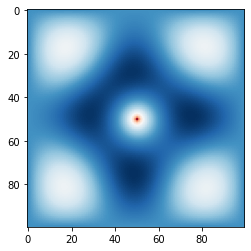

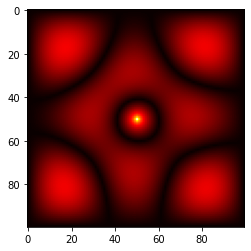

In [15]:
pec_pmc = pec_pmc_boundary.PEC_PMC(N)
mx= pec_pmc.mask_x;
my = pec_pmc.mask_y;
wvlen = 0.5e-6;
omega = 2*np.pi*C0/wvlen;

epxx = grid_average(eps_r,'x')
epyy = grid_average(eps_r, 'y')

invTepxx = sp.spdiags(1/epxx.flatten(),0,M,M);
invTepyy = sp.spdiags(1/epyy.flatten(),0,M,M);

fd = FiniteDifference(dL,N)
I = sp.identity(M)
A = (mx@fd.Dxf)@(invTepxx)@(fd.Dxb@mx) + (my@fd.Dyf)@(invTepyy)@(fd.Dyb@my) + omega**2*MU0*EPSILON0*I;

print(A.shape, b.shape)
## spsolve
from scipy.sparse.linalg import splu
solver = splu(A);

x = solver.solve(b)
field = np.reshape(x, N)

plt.imshow(np.real(field), cmap = 'RdBu')
plt.show();

plt.imshow(np.abs(field), cmap = 'hot')
plt.show();